<a href="https://colab.research.google.com/github/kevincong95/cs231n-emotiw/blob/master/notebooks/2.0-la-tj-ak-kc-vl-variational-autoencoder-fusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Variational Autoencoder Fusion


In [0]:

# Clone the code base
!git clone 'https://github.com/kevincong95/cs231n-emotiw.git'

# Switch to TF 1.x and navigate to the directory
%tensorflow_version 1.x
!pwd
import os
os.chdir('cs231n-emotiw')
!pwd

# Install required packages 
!pip install -r 'requirements-predictions.txt'


Cloning into 'cs231n-emotiw'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 688 (delta 0), reused 0 (delta 0), pack-reused 683
Receiving objects: 100% (688/688), 173.53 MiB | 11.94 MiB/s, done.
Resolving deltas: 100% (408/408), done.
TensorFlow 1.x selected.
/content
/content/cs231n-emotiw
     |████████████████████████████████| 389kB 5.2MB/s 
     |████████████████████████████████| 634kB 8.1MB/s 
     |████████████████████████████████| 3.3MB 12.7MB/s 
     |████████████████████████████████| 26.9MB 81kB/s 
     |████████████████████████████████| 337kB 42.4MB/s 
     |████████████████████████████████| 25.4MB 98kB/s 
     |████████████████████████████████| 100.2MB 61kB/s 
  Created wheel for moviepy: filename=moviepy-1.0.3-cp36-none-any.whl size=110728 sha256=241160afe22df5256b43365df62897d349d5f5b2b9d185c88fa45b305f75a0e9
  Stored in directory: /root/.cache/pip/wheels/e0/fe/1c/f4e6dca9e828

## Preprocess Files

**IMPORTANT**: Skip to the "Copy Pre-Processed Files" section if you wish to reuse existing pre-processed files

In [0]:
!apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
!wget https://storage.googleapis.com/cs231n-emotiw/openpose/openpose.tar.gz
!tar -xzf openpose.tar.gz

# The pre-built OpenPose library contains shared library files that need to be manually linked
import os
orig_lib_path = os.environ['LD_LIBRARY_PATH']
os.environ["LD_LIBRARY_PATH"] = f"{orig_lib_path}:{os.getcwd()}/openpose/build/src/openpose/:{os.getcwd()}/openpose/build/caffe/lib/"

!wget https://storage.googleapis.com/cs231n-emotiw/data/train-tiny.zip
!wget https://storage.googleapis.com/cs231n-emotiw/data/val-tiny.zip
!wget https://storage.googleapis.com/cs231n-emotiw/data/test-tiny.zip
!wget https://storage.googleapis.com/cs231n-emotiw/data/Train_labels.txt
!wget https://storage.googleapis.com/cs231n-emotiw/data/Val_labels.txt


Selecting previously unselected package libgflags2.2.
(Reading database ... 144439 files and directories currently installed.)
Preparing to unpack .../00-libgflags2.2_2.2.1-1_amd64.deb ...
Unpacking libgflags2.2 (2.2.1-1) ...
Selecting previously unselected package libgflags-dev.
Preparing to unpack .../01-libgflags-dev_2.2.1-1_amd64.deb ...
Unpacking libgflags-dev (2.2.1-1) ...
Selecting previously unselected package libgoogle-glog0v5.
Preparing to unpack .../02-libgoogle-glog0v5_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog0v5 (0.3.5-1) ...
Selecting previously unselected package libgoogle-glog-dev.
Preparing to unpack .../03-libgoogle-glog-dev_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog-dev (0.3.5-1) ...
Selecting previously unselected package libhdf5-serial-dev.
Preparing to unpack .../04-libhdf5-serial-dev_1.10.0-patch1+docs-4_all.deb ...
Unpacking libhdf5-serial-dev (1.10.0-patch1+docs-4) ...
Selecting previously unselected package libleveldb1v5:amd64.
Preparing to unpack ...

In [0]:
from src.preprocessors.preprocess_all_modes import preprocess
from src.preprocessors.pose_preprocessor import PosePreprocessor

print("Starting to preprocess train data")
preprocess(video_folder="train-tiny.zip", label_file="Train_labels.txt", local_base_path="train-tiny")

print("Starting to preprocess val data")
preprocess(video_folder="val-tiny.zip", label_file="Val_labels.txt", local_base_path="val-tiny")

print("Starting to preprocess test data")
preprocess(video_folder="test-tiny.zip", local_base_path="test-tiny")

Using TensorFlow backend.


Starting to preprocess train data
Video Preprocessor created with video_folder = train-tiny.zip , label_file = Train_labels.txt , output_folder = train-tiny-frames, output_file = train-tiny-frames.zip
Frames will be created with height = 320 , width = 480 , sample_every = 10
Video Preprocessor created with video_folder = train-tiny.zip , output_folder = train-tiny-faces, output_file = train-tiny-faces.zip
Frames will be created with height = 320 , width = 480 , sample_every = 10
Pose Preprocessor created with is_test = False, video_frame_folder = train-tiny-frames , output_folder = train-tiny-pose, output_file = train-tiny-pose.zip
Video Preprocessor created with video_folder = train-tiny.zip , output_folder = train-tiny-audio, output_file = train-tiny-audio.zip
Frames will be created with hop_size = 0.5
Unzipping files to temp dir train-tiny-frames_tmp...
Finished unzipping files
Found 50 videos
Processing video 1/50 with name 101_12.mp4 and class 3 

Processing video 3/50 with name 1

In [0]:
# Remove the openpose folder as it is no longer required
!rm -rf openpose/

## Copy Pre-Processed Files
**IMPORTANT**: Run ONLY if you have NOT done the preprocessing

In [0]:
from google.colab import drive
drive.mount('/content/drive')
TINY_PATH = 'My Drive/Machine-Learning-Projects/cs231n-project/datasets/emotiw'
!cp /content/drive/'$TINY_PATH'/train-tiny-* .
!cp /content/drive/'$TINY_PATH'/val-tiny-* .

!unzip -d train-tiny-audio train-tiny-audio.zip
!unzip -d train-tiny-frames train-tiny-frames.zip
!unzip -d train-tiny-pose train-tiny-pose.zip
!unzip -d train-tiny-faces train-tiny-faces.zip
!unzip -d val-tiny-audio val-tiny-audio.zip
!unzip -d val-tiny-frames val-tiny-frames.zip
!unzip -d val-tiny-pose val-tiny-pose.zip
!unzip -d val-tiny-faces val-tiny-faces.zip

!wget https://storage.googleapis.com/cs231n-emotiw/data/Train_labels.txt
!wget https://storage.googleapis.com/cs231n-emotiw/data/Val_labels.txt

# Convolutional Variational Autoencoder

This code was adapted from the Tensorflow Convolutional VAE tutorial.

In [0]:
import tensorflow as tf

import os
import time
import numpy as np
import glob
import matplotlib.pyplot as plt
import PIL
import imageio

from IPython import display

In [0]:
class CVAE(tf.keras.Model):
  def __init__(self, latent_dim):
    super(CVAE, self).__init__()
    self.latent_dim = latent_dim
    self.inference_net = tf.keras.Sequential(
      [
          tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
          tf.keras.layers.Conv2D(
              filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
          tf.keras.layers.Conv2D(
              filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
          tf.keras.layers.Flatten(),
          # No activation
          tf.keras.layers.Dense(latent_dim + latent_dim),
      ]
    )

    self.generative_net = tf.keras.Sequential(
        [
          tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
          tf.keras.layers.Dense(units=7*7*32, activation=tf.nn.relu),
          tf.keras.layers.Reshape(target_shape=(7, 7, 32)),
          tf.keras.layers.Conv2DTranspose(
              filters=64,
              kernel_size=3,
              strides=(2, 2),
              padding="SAME",
              activation='relu'),
          tf.keras.layers.Conv2DTranspose(
              filters=32,
              kernel_size=3,
              strides=(2, 2),
              padding="SAME",
              activation='relu'),
          # No activation
          tf.keras.layers.Conv2DTranspose(
              filters=1, kernel_size=3, strides=(1, 1), padding="SAME"),
        ]
    )

  @tf.function
  def sample(self, eps=None):
    if eps is None:
      eps = tf.random.normal(shape=(100, self.latent_dim))
    return self.decode(eps, apply_sigmoid=True)

  def encode(self, x):
    mean, logvar = tf.split(self.inference_net(x), num_or_size_splits=2, axis=1)
    return mean, logvar

  def reparameterize(self, mean, logvar):
    eps = tf.random.normal(shape=mean.shape)
    return eps * tf.exp(logvar * .5) + mean

  def decode(self, z, apply_sigmoid=False):
    logits = self.generative_net(z)
    if apply_sigmoid:
      probs = tf.sigmoid(logits)
      return probs

    return logits

In [0]:
optimizer = tf.keras.optimizers.Adam(1e-4)

def log_normal_pdf(sample, mean, logvar, raxis=1):
  log2pi = tf.math.log(2. * np.pi)
  return tf.reduce_sum(
      -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
      axis=raxis)

@tf.function
def compute_loss(model, x):
  mean, logvar = model.encode(x)
  z = model.reparameterize(mean, logvar)
  x_logit = model.decode(z)

  cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
  logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
  logpz = log_normal_pdf(z, 0., 0.)
  logqz_x = log_normal_pdf(z, mean, logvar)
  return -tf.reduce_mean(logpx_z + logpz - logqz_x) , z

@tf.function
def compute_apply_gradients(model, x, optimizer):
  with tf.GradientTape() as tape:
    loss , z  = compute_loss(model, x)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [0]:
epochs = 100
latent_dim = 50
num_examples_to_generate = 16

# keeping the random vector constant for generation (prediction) so
# it will be easier to see the improvement.
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim])
model = CVAE(latent_dim)

In [0]:
def generate_and_save_images(model, epoch, test_input):
  predictions = model.sample(test_input)
  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0], cmap='gray')
      plt.axis('off')

  # tight_layout minimizes the overlap between 2 sub-plots
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [0]:
TRAIN_BUF = 60000
BATCH_SIZE = 100

TEST_BUF = 10000

In [0]:
import cv2

def reshape_X(input_x):
  X_train_expand = np.expand_dims(input_x , axis=1)
  all_expanded_x = []
  for x in X_train_expand:
    X_sample_train = np.concatenate([x]*310)
    X_sample_train = cv2.resize(X_sample_train, (28, 28))
    all_expanded_x.append(X_sample_train)

    
  all_expanded_x = np.asarray(all_expanded_x, dtype='float32')
  all_expanded_x = np.expand_dims(all_expanded_x , axis=3)

  return all_expanded_x


X_train_img = reshape_X(X_train)
X_val_img = reshape_X(X_valid)
print(X_val_img.shape)
train_dataset = tf.data.Dataset.from_tensor_slices(X_train_img).shuffle(TRAIN_BUF).batch(BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices(X_val_img).shuffle(TEST_BUF).batch(BATCH_SIZE)

(50, 28, 28, 1)


In [0]:
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))



Epoch: 100, Test set ELBO: -148.9407501220703, time elapse for current epoch 0.011865615844726562


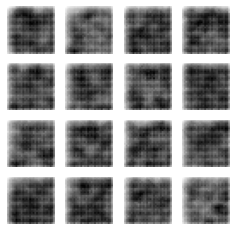

In [0]:
generate_and_save_images(model, 0, random_vector_for_generation)
z = None
for epoch in range(1, epochs + 1):
  start_time = time.time()
  for train_x in train_dataset:
    compute_apply_gradients(model, train_x, optimizer)
  end_time = time.time()

  if epoch % 1 == 0:
    loss = tf.keras.metrics.Mean()
    for test_x in test_dataset:
      loss_test , z = compute_loss(model, test_x)
      loss(loss_test)
    elbo = -loss.result()
    display.clear_output(wait=False)
    print('Epoch: {}, Test set ELBO: {}, '
          'time elapse for current epoch {}'.format(epoch,
                                                    elbo,
                                                    end_time - start_time))
    generate_and_save_images(
        model, epoch, random_vector_for_generation)

In [0]:
print(z.shape)

(50, 50)


In [0]:
input_z = np.expand_dims(z , axis=1)

In [0]:
y_train_np = np.asarray(y_train) - 1
y_val_np = np.asarray(y_valid) - 1
print(y_train_np.shape)
print(y_val_np.shape)

(50,)
(50,)


## Feed the encodings into a classifier

In [0]:
input_z = np.expand_dims(z , axis=2)

inputs = tf.keras.Input(shape=[input_z.shape[1], input_z.shape[2]])

x = tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='selu')(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding='valid')(x)
x = tf.keras.layers.Conv1D(filters=128, kernel_size=2, activation='selu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding='valid')(x)
x = tf.keras.layers.Conv1D(filters=216, kernel_size=2, activation='selu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding='valid')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(100, activation = 'selu')(x)
outputs = tf.keras.layers.Dense(3, activation = 'softmax')(x)


model = tf.keras.Model(inputs=[inputs] , outputs=[outputs])
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
      initial_learning_rate= 1e-6, #This LR came from the hyperparameter tuning using the HyperAS (modified HyperOpt for Keras) -- randomized search
      decay_steps=10000,
      decay_rate=0.9)
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
initial_epochs = 100

save_path = "/content/drive/My Drive/Machine-Learning-Projects/cs231n-project/models/conv_vae_classifier.h5"
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=300)
mc = ModelCheckpoint(save_path, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history = model.fit(
          x=input_z, y=y_val_np,
          epochs=initial_epochs,
          validation_split = 0.1
)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/2 [==============>...............] - ETA: 0s - loss: 1.5294 - accuracy: 0.4688WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f5c9f6402f0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the 